In [20]:
# Importing the required libraries
from keras.datasets import cifar10
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

In [21]:
# Loading the CIFAR-10 dataset
(X_train, Y_train), (x_test, y_test) = cifar10.load_data()

In [22]:
class KNN:
    def __init__(self, n_neighbors=3) -> None:
        """
        Constructor method that initializes a KNN object with an optional parameter `n_neighbors`
        that specifies the number of nearest neighbors to consider for classification.
        :param self: KNN. The KNN object.
        :param n_neighbors: int, default=3. The number of nearest neighbors to consider for classification.
        :return: None
        """
        self.k = n_neighbors
        self.X_train = None
        self.Y_train = None
    @staticmethod
    def cosine_similarity(vector1: np.ndarray, vector2: np.ndarray) -> float:
        """
        A static method that calculates the cosine similarity between two vectors using dot product and vector norms.

        :param vector1: np.ndarray. The first vector for which to calculate cosine similarity.
        :param vector2: np.ndarray. The second vector for which to calculate cosine similarity.
        :return: float. The cosine similarity between the two input vectors.
        """
        cos_sim = np.dot(vector1, vector2)
        cos_sim /= (np.linalg.norm(vector1) * np.linalg.norm(vector2))
        return cos_sim

In [23]:
def fit(self, train_dataset: np.ndarray, train_labels: np.ndarray) -> None:
    """
    A method that fits the KNN model to the training dataset and training labels.

    :param self: KNN. The KNN object.
    :param train_dataset: np.ndarray. The training dataset.
    :param train_labels: np.ndarray. The training labels.
    :return: None
    """
    self.X_train = train_dataset.reshape(train_dataset.shape[0], -1)
    self.Y_train = train_labels.flatten()

In [24]:
def predict(self, test_dataset:np.ndarray) -> list:
    """
    A method that predicts the labels for the input test dataset.
    :param self: KNN. The KNN object.
    :param test_dataset: np.ndarray. The test dataset.
    :return: list. The predicted labels for the input test dataset.
    """
    test_dataset = test_dataset.reshape(test_dataset.shape[0], -1)
    predictions = [self._predict(sample) for sample in test_dataset]
    return predictions

In [25]:
def _predict(self, sample) -> list:
    """
    A method that predicts the label for a single sample.

    :param self: KNN. The KNN object.
    :param sample: np.ndarray. The sample for which to predict the label.
    :return: list. The predicted label for the input sample.
    """
    distances = []
    for img in self.X_train:
        distances.append(self.cosine_similarity(sample, img))
    k_nearest_indices = np.argsort(distances)[::-1][:self.k]
    k_nearest_labels = [self.Y_train[j] for j in k_nearest_indices]
    most_common = Counter(k_nearest_labels).most_common()[0][0]
    return most_common

In [26]:
# Assigning the methods to the class
KNN.fit = fit
KNN.predict = predict
KNN._predict = _predict

In [27]:
# Mapping the class labels to their respective names
category_map = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

In [28]:
# Creating an instance of the KNN class
clsf = KNN(n_neighbors=10)
clsf.fit(train_dataset=X_train, train_labels=Y_train)

In [29]:
# Predicting the labels for the first (stop - start + 1) samples in the test dataset
start, stop = 200, 205
predictions = clsf.predict(test_dataset=x_test[start:stop+1])

In [30]:
# Calculating the error ratio
prediction_accuracy_array = np.array(predictions == y_test.flatten()[start:stop+1])
error_ratio = np.count_nonzero(prediction_accuracy_array == False) / len(prediction_accuracy_array)

In [31]:
# Printing the error ratio and the total number of inputs
print(f"Error Ratio:{error_ratio * 100}%", f"Total Input Count:{stop-start+1}", sep='\n')

Error Ratio:83.33333333333334%
Total Input Count:6


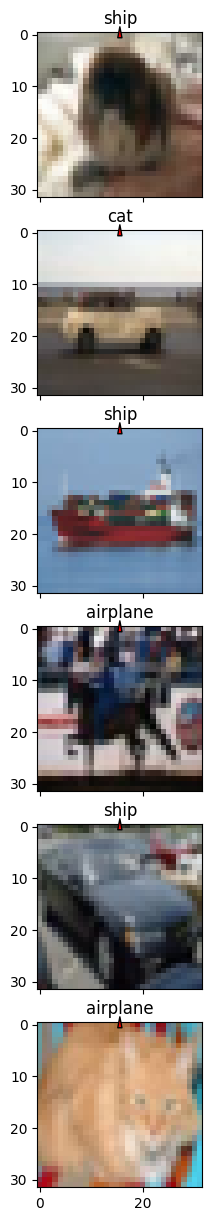

In [32]:
# Plotting the images and their predicted labels
fig, ax = plt.subplots(nrows=stop-start+1, ncols=1, figsize=(5, (stop-start)*3), sharex=True)
for i in range(0, stop-start+1):
    ax[i].imshow(x_test[i+start])
    ax[i].set_title(f"{category_map[predictions[i]]}")
    ax[i].annotate('',xy=(0.5, 1.05),xycoords='axes fraction',xytext=(0.5, 0.95),textcoords='axes fraction',\
                   arrowprops=dict(facecolor='red', arrowstyle='wedge'))